# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [71]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

In [72]:
data_df = pd.read_csv("bank.csv")

# Check the data. Check shape, data type, and info

In [73]:
data_df.head(10)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579
5,6,200,229,57,3470,625
6,7,144,88,112,3190,476
7,8,256,165,46,2930,621
8,9,282,139,105,2110,658
9,10,317,196,72,3000,717


In [74]:
data_df.shape

(515, 6)

In [75]:
data_df.dtypes

Bank                   int64
DD                     int64
Withdrawals            int64
Deposits               int64
Branch Area in sqft    int64
avg daily walkins      int64
dtype: object

In [76]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
Bank                   515 non-null int64
DD                     515 non-null int64
Withdrawals            515 non-null int64
Deposits               515 non-null int64
Branch Area in sqft    515 non-null int64
avg daily walkins      515 non-null int64
dtypes: int64(6)
memory usage: 24.3 KB


# Checking Summary Statistic

In [77]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bank,515.0,258.000000,148.811962,1.0,129.5,258.0,386.5,515.0
DD,515.0,232.252427,66.648815,120.0,169.5,237.0,291.0,350.0
Withdrawals,515.0,150.693204,56.897777,10.0,103.0,152.0,200.0,247.0
Deposits,515.0,81.687379,28.596912,33.0,58.0,80.0,105.0,212.0
Branch Area in sqft,515.0,2934.669903,437.062831,1200.0,2675.0,2960.0,3300.0,3650.0
avg daily walkins,515.0,598.603883,83.487891,380.0,537.5,601.0,657.5,838.0


# Checking for Duplicates

In [78]:
data_df.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
510    False
511    False
512    False
513    False
514    False
Length: 515, dtype: bool

In [79]:
data_df.duplicated().sum()

0

E:\anaconda distribution\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


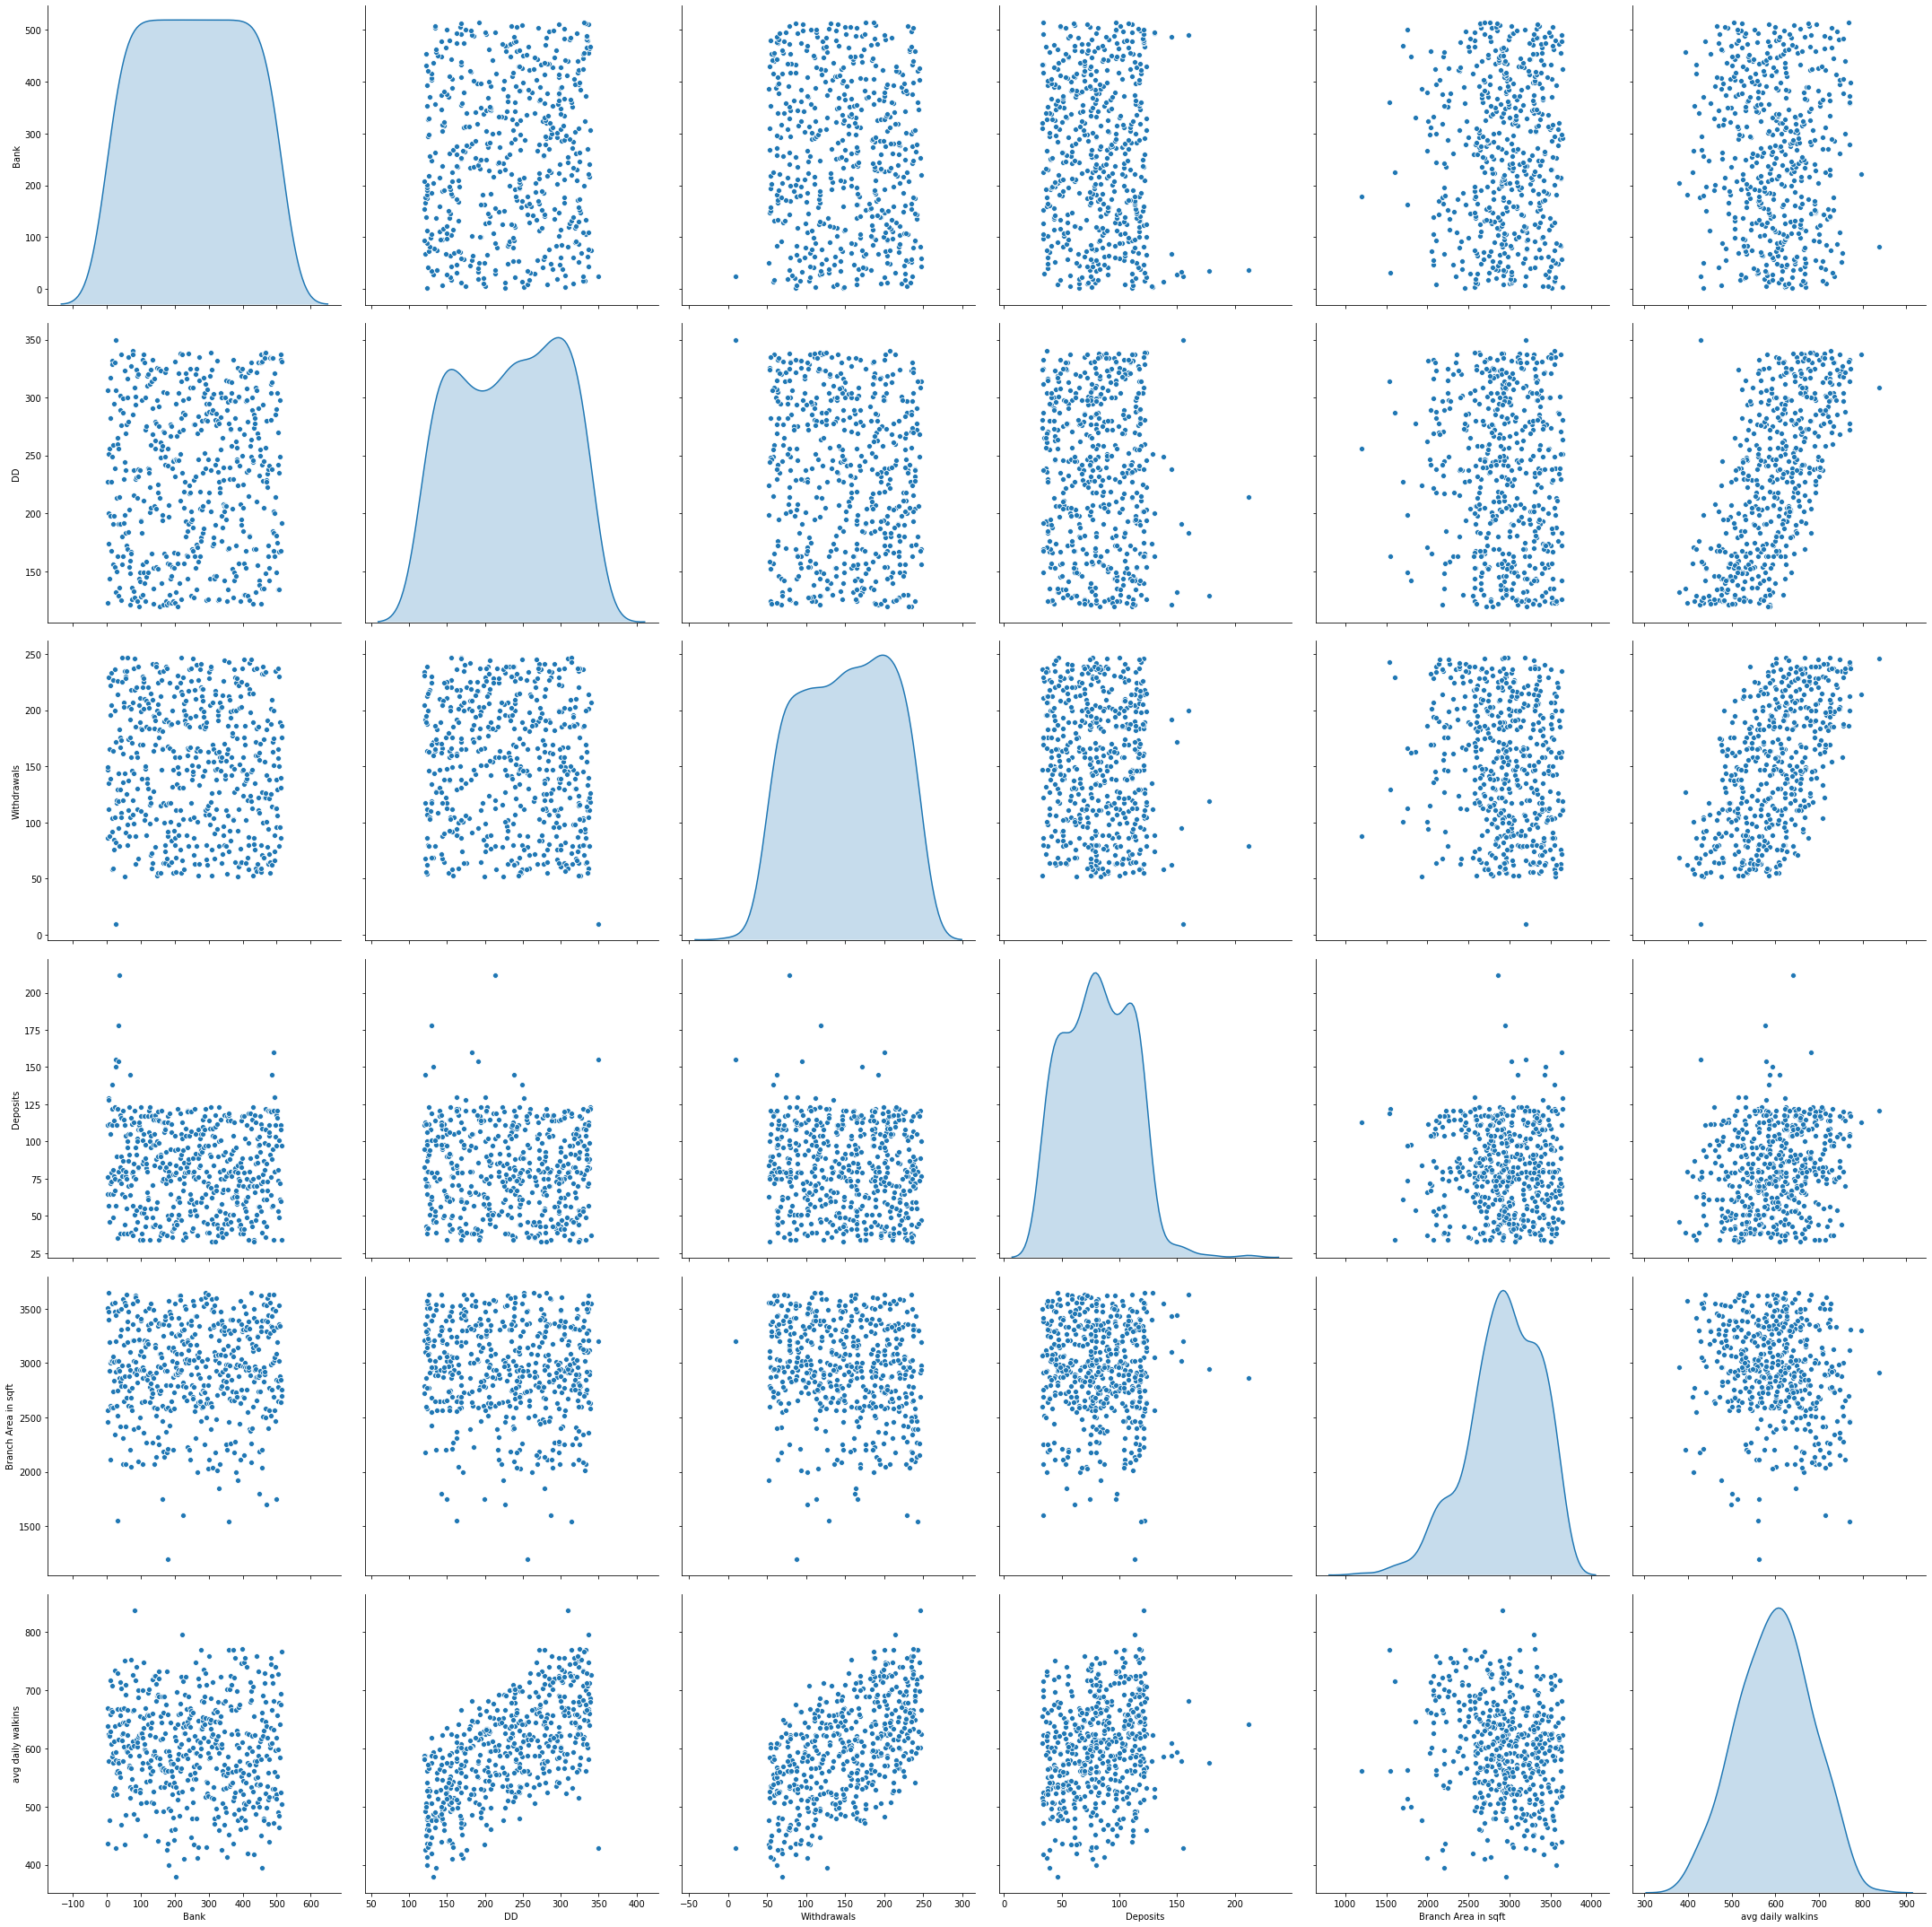

In [80]:
import seaborn as sns
sns.pairplot(data_df,size=5 , diag_kind='kde')

# Scaling the data

In [81]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [82]:
# Creating an object for the StandardScaler function
sc=StandardScaler()
scaled_df1 = sc.fit_transform(data_df)

In [83]:
scaled_df1

array([[-1.72869086, -0.07888413, -0.06497257,  1.02602411, -1.08710095,
         0.48432644],
       [-1.72196444, -1.64081915, -1.13811308, -0.58410514,  1.31763546,
        -1.949528  ],
       [-1.71523801,  1.10758573, -0.02978763, -0.19907423, -0.83517619,
         0.84400936],
       ...,
       [ 1.71523801,  1.51308809, -1.13811308,  0.92101568, -0.19391314,
         0.92793538],
       [ 1.72196444, -0.60453534,  0.44520899, -1.66919225, -0.40003341,
        -1.12225728],
       [ 1.72869086,  1.48305088,  0.62113366,  0.53598477, -0.53744692,
         2.01897357]])

In [84]:
scaled_df = pd.DataFrame(scaled_df1, columns=data_df.columns)
scaled_df 

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-1.728691,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.721964,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,-1.715238,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,-1.708512,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-1.701785,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...,...
510,1.701785,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,1.708512,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.715238,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,1.721964,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


# Creating Clusters using KMeans

### Build a KMeans model having 2 Clusters

In [85]:
# Create K Means cluster and store the result in the object k_means

k_means = KMeans( n_clusters = 2, random_state = 1 )

In [86]:
# Fit K means on the scaled_df

k_means.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

### Check cluster Output for all the observations

In [87]:
# Get the labels
k_means.labels_

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

### Calculate within Cluster Sum of Squares

In [88]:
k_means.inertia_ 

2447.950426054663

### Form clusters with K = 1,3,4,5,6 and compare the WSS ( within cluster sum of squares)

In [89]:
cluster_range = range( 1,7)  
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(scaled_df)
  labels = clusters.labels_                    
  centroids = clusters.cluster_centers_         
  cluster_errors.append( clusters.inertia_ )    

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df

,num_clusters,cluster_errors
0,1,3090.000000
1,2,2448.096591
2,3,2101.905283
3,4,1852.712159
4,5,1699.756520
5,6,1567.703899


### Calculate WSS for other values of K ( can use range of K = 1 to 20) - Elbow Method

In [90]:
wss =[]
cluster_range = range(1, 20)  

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(scaled_df)
  labels = clusters.labels_                    
  centroids = clusters.cluster_centers_         
  wss.append( clusters.inertia_ )    

clusters_df1 = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": wss} )
clusters_df1

,num_clusters,cluster_errors
0,1,3090.000000
1,2,2447.956290
2,3,2102.466255
3,4,1852.090259
4,5,1705.611033
5,6,1584.253788
6,7,1480.072311
7,8,1386.440160
8,9,1332.360127
9,10,1253.590146


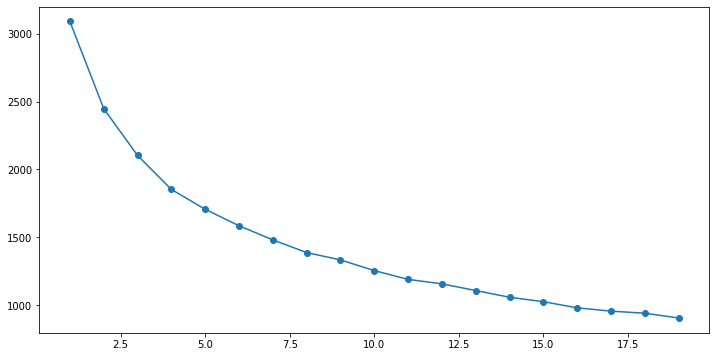

In [91]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df1.num_clusters, clusters_df1.cluster_errors, marker = "o" )

## Build a KMeans model with K=3

In [92]:
kmeans = KMeans( n_clusters = 3, random_state = 1 )
kmeans.fit(scaled_df)
kmeans.inertia_ 


2101.900645488458

In [93]:
labels = kmeans.labels_    
labels

array([1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0,
       1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0,
       0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1,
       0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1,
       1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0,
       0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1,

### Use silhouette score to evaluate the above model ( 3 clusters)

In [94]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [95]:
# Calculating silhouette_score
silhouette_score = metrics.silhouette_score(scaled_df, labels, metric='euclidean')
print ('silhouette_score',silhouette_score)

silhouette_score 0.1781685276596942


# Build a KMeans model with K=4

### Use silhouette score to evaluate the above model ( 4 clusters)

In [96]:
#from sklearn.metrics import silhouette_samples, silhouette_score
Clus_kmeans = KMeans( n_clusters = 4, random_state = 1 )
Clus_kmeans.fit(scaled_df)
Clus_kmeans_label = Clus_kmeans.labels_     
score = metrics.silhouette_score(scaled_df, Clus_kmeans_label, metric='euclidean')
print ('silhouette_score',score)

silhouette_score 0.1855676741956923


In [97]:
Clus_kmeans_label

array([0, 3, 2, 1, 0, 0, 3, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 3, 2, 1, 0,
       0, 0, 2, 1, 0, 0, 3, 2, 0, 2, 3, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 3, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0,
       3, 1, 1, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 3, 1,
       1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 3, 2, 1, 2, 0, 3, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 3, 3, 2, 1, 1, 1, 1, 0, 0, 2,
       3, 2, 2, 3, 3, 3, 0, 0, 0, 1, 2, 3, 1, 3, 0, 0, 1, 1, 2, 3, 3, 0,
       0, 1, 3, 1, 1, 3, 2, 1, 3, 0, 0, 1, 1, 1, 1, 3, 1, 1, 0, 0, 1, 2,
       2, 1, 1, 1, 2, 3, 0, 0, 2, 0, 2, 0, 0, 1, 3, 2, 0, 0, 0, 1, 2, 0,
       2, 1, 2, 1, 0, 3, 0, 3, 3, 0, 3, 2, 1, 1, 3, 1, 0, 0, 2, 0, 1, 3,
       0, 1, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 2, 3, 0, 2, 2,

Appending Clusters to the original dataset

In [98]:
prediction= Clus_kmeans.predict(scaled_df)  
data_df["Clus_kmeans4"] = prediction  # Store the cluster id into a new "group" column


data_df.tail(50)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clus_kmeans4
465,466,148,122,108,3390,523,3
466,467,339,126,122,2580,680,2
467,468,257,234,36,2500,646,2
468,469,229,142,85,3530,588,1
469,470,227,101,61,1700,498,3
470,471,280,183,43,3290,639,1
471,472,223,78,73,3380,536,3
472,473,234,191,67,3600,618,1
473,474,172,64,98,3440,471,3
474,475,163,94,121,3240,512,3


# Cluster Profiling

In [99]:
data_df.Clus_kmeans4.value_counts().sort_index()

0    132
1    146
2    129
3    108
Name: Clus_kmeans4, dtype: int64

In [100]:
clust_profile=data_df.drop(['Bank'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
Clus_kmeans4,,,,,,
0,180.015152,190.416667,89.439394,2992.727273,597.515152,132
1,288.445205,102.924658,77.034247,3117.191781,598.986301,146
2,280.465116,194.480620,85.333333,2592.713178,693.023256,129
3,162.546296,114.416667,74.148148,3025.416667,486.638889,108


# Mention your insights

- Cluster 0 : Medium size bank with less walkins and high withdrawals and deposits.
- Cluster 1: Large size bank with more number of walkins and highest DD, but less Deposits
- Cluster 2: Small size bank with less deposit but highest walkins and Withdrawals, and large DD
- Cluster 3 : Medium size bank with less withdrawal & walkins